In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))
sns.set(style='whitegrid')
# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


### Black Friday
Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season.Many stores offer highly promoted sales on Black Friday and open very early, such as at midnight, or may even start their sales at some time on Thanksgiving. Black Friday is not an official holiday, but California and some other states observe "The Day After Thanksgiving" as a holiday for state government employees. 

**Lets load the data**

In [2]:
dataFrame = pd.read_csv('../input/BlackFriday.csv')

In [3]:
#Let see the first five rows of the dataset
dataFrame.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Lets see some statistics about the data
dataFrame.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
#Lets see present total Nans in each column
dataFrame.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
dataFrame.shape

(537577, 12)

From the above two cells we can see that we have 537577 no. of rows or entries and product_category_2 and 3 has NaNs present. We will deal with NaNs latter, Lets visualize and try to get some good insights about the data.

**Visualizing Occupation**

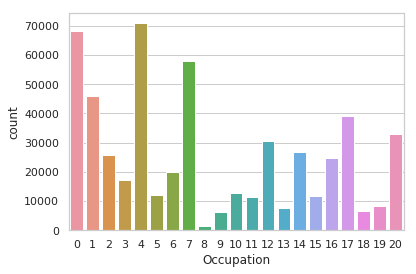

In [7]:
sns.countplot(x='Occupation', data=dataFrame)

Here we can see that we have 20 different occupations. **x-axies is occupations and y-axis is no. of people belong to that occupations(thus count)**. From the plot we can see that occupation '8' has leat no. of users associated with it and occupation 4, 0, 7 are Top 3.

In [8]:
#Lets see what are the city category we have here
dataFrame.City_Category.value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

so, we have 3 categories of city namely A, B, C and B, C, A is the Descending order of the people live in that city categoty. 

### Occupation in City_category
Lets see the distribution of each occupation in each city

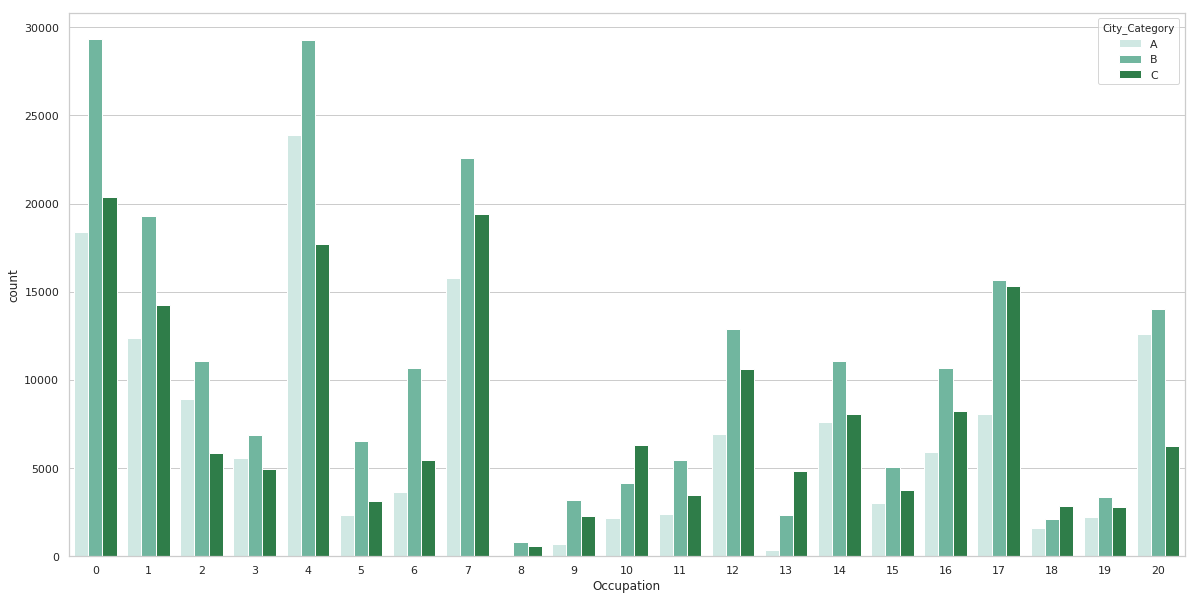

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
hue_order = ['A', 'B', 'C']
sns.countplot(x='Occupation', hue='City_Category', hue_order=hue_order, data=dataFrame, palette='BuGn')

In [10]:
#Let see what are the age groups we have here
dataFrame.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

so, we have 7 different age groups here.

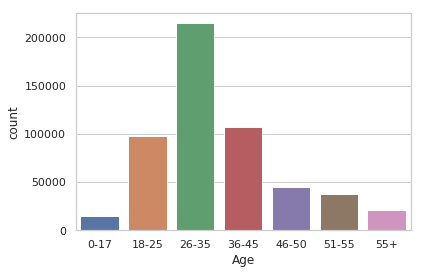

In [11]:
#Lets visualize age-group distribution 
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.countplot(x='Age', data=dataFrame, order=age_order)

**Lets see the distribution of Gender in age_group**

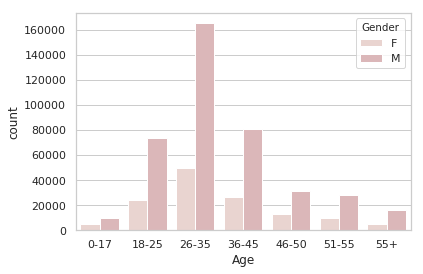

In [12]:
sns.countplot(x='Age', hue='Gender', data=dataFrame, order=age_order, palette=sns.cubehelix_palette(8))

**We can see that in every age group male users are dominating**

### Age-group vs Product_Category_x
Lets see how each age-group has purchased each of the product category  

In [13]:
#creating a separate dataframe with two columns namely age and product_category_1 from original dataframe
data_age_prod1 = pd.concat([dataFrame['Age'], dataFrame['Product_Category_1']], axis=1)
#mapping each age group to integer value
data_age_prod1['Age'] = data_age_prod1['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})

In [14]:
data_age_prod1.head()

,Age,Product_Category_1
0,0,3
1,0,1
2,0,12
3,0,12
4,6,8


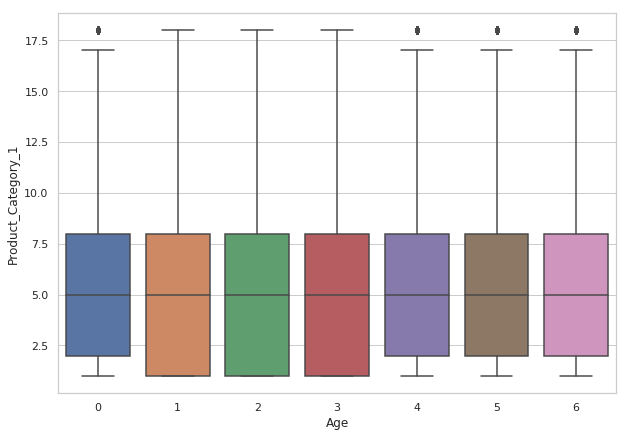

In [15]:
#age vs product_category_1
plt.subplots(figsize=(10,7))
sns.boxplot(x='Age', y='Product_Category_1', data=data_age_prod1)

In [16]:
#Filling the NaNs, here NaNs means users haven't purchased that product 
dataFrame.fillna(value=0, inplace=True)

In [17]:
dataFrame['Product_Category_2'].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
dataFrame['Product_Category_2'] = dataFrame['Product_Category_2'].astype(int)
dataFrame['Product_Category_3'] = dataFrame['Product_Category_3'].astype(int)

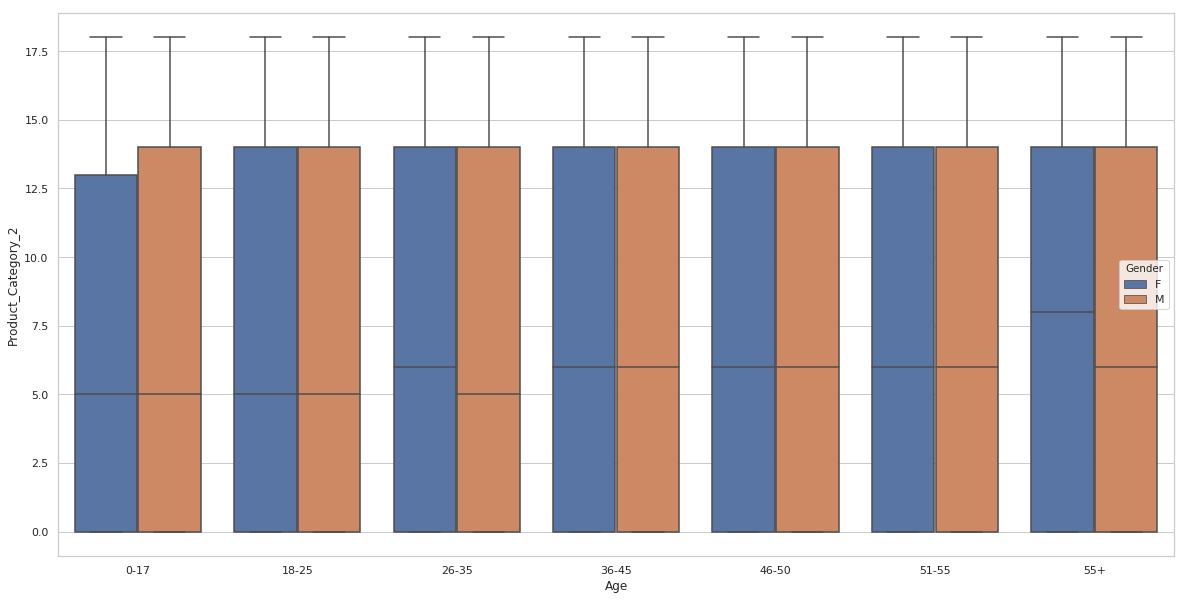

In [19]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='Age', y='Product_Category_2', hue='Gender', order=age_order, data=dataFrame)

The above plot describe how each age group has purchased product_category_2 separated by gender. 

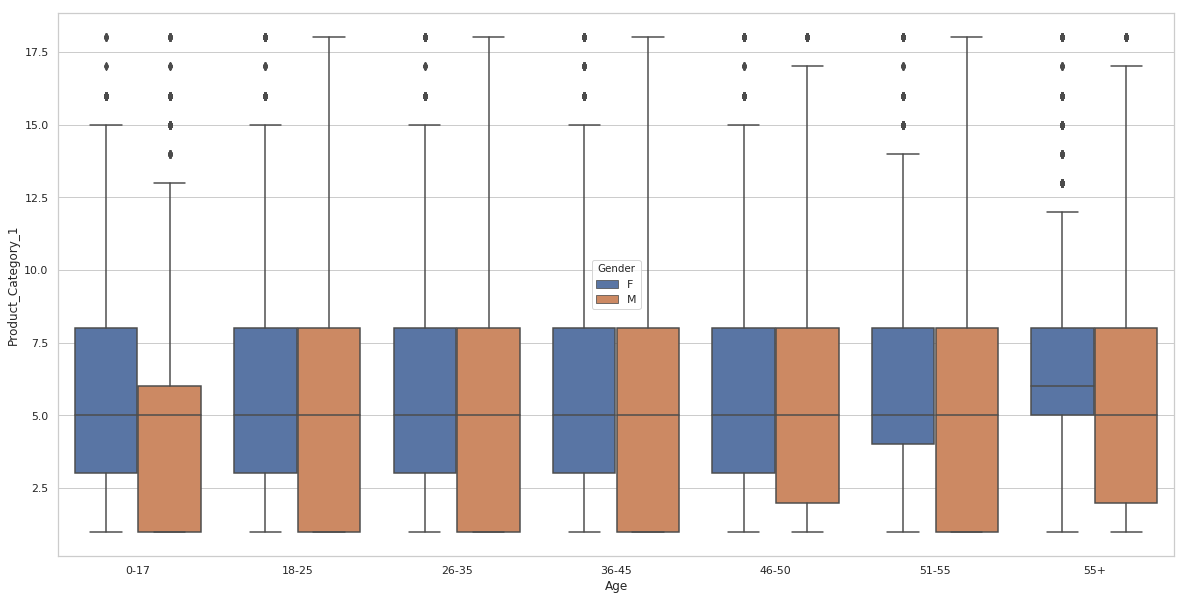

In [20]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='Age', y='Product_Category_1', hue='Gender', order=age_order, data=dataFrame)

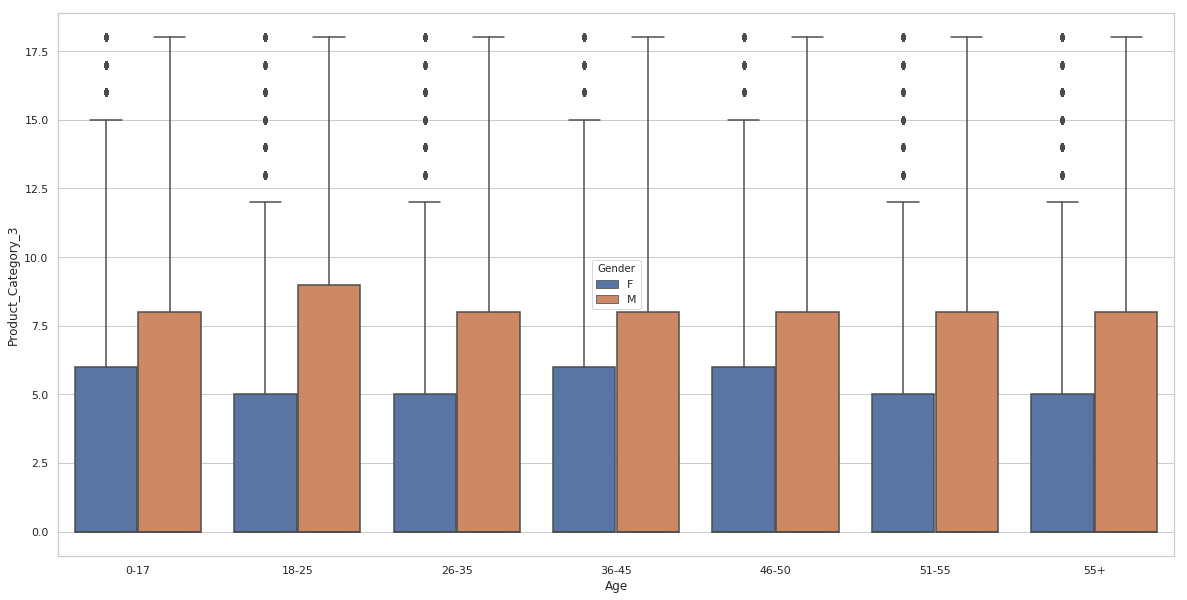

In [21]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='Age', y='Product_Category_3', hue='Gender', order=age_order, data=dataFrame)

### City type vs Purchase
Lets see how each city purchased on blackfriday

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


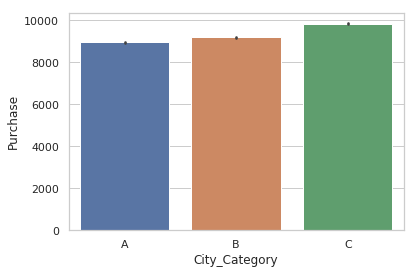

In [22]:
city_order = ['A', 'B', 'C']
sns.barplot(x='City_Category', y='Purchase', order=city_order, data=dataFrame)

The difference between by users from each city is less. City category B has heights no. of users followed by C, followed by A. Despite having most of the occupation users from B spends less than C.

**Lets see how gender played a role in purchasing**

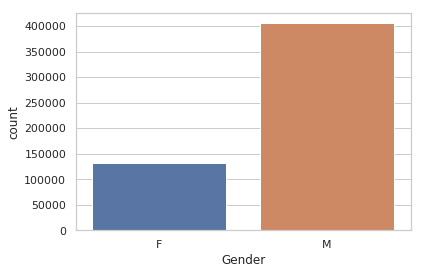

In [24]:
sns.countplot(dataFrame['Gender'])

Male users are highly dominating in this case. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


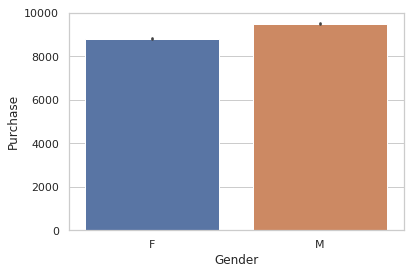

In [25]:
sns.barplot(x='Gender', y='Purchase', data=dataFrame)

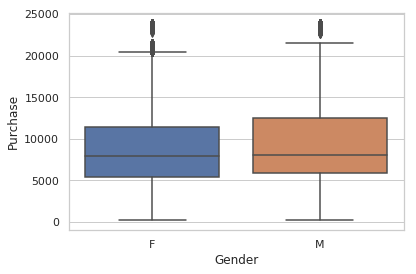

In [26]:
sns.boxplot(x='Gender', y='Purchase', data=dataFrame)

This plot shows gender wise distribution of purchase. 

**Lets see how marital status played in purchase**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


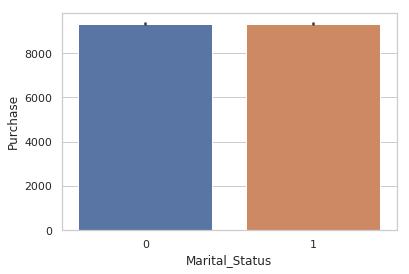

In [27]:
sns.barplot(x='Marital_Status', y='Purchase', data=dataFrame)

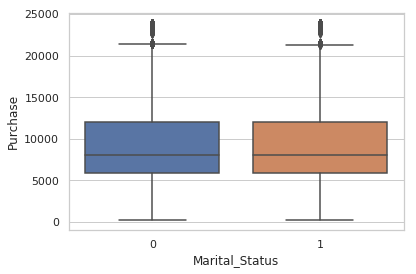

In [28]:
sns.boxplot(x='Marital_Status', y='Purchase', data=dataFrame)

**Users' tendency of purchase isn't effected by their marital status**

**Lets find out total purchase of each occupation**

In [29]:
#Creating a new dataframe by concating 'Occupation' and 'Purchase' from original dataframe
df_occu_purchase = pd.concat([dataFrame['Occupation'], dataFrame['Purchase']], axis=1)

In [30]:
df_occu_purchase.head()

,Occupation,Purchase
0,10,8370
1,10,15200
2,10,1422
3,10,1057
4,16,7969


In [31]:
#Here we are creating another dataframe from df_occu_purchase using groupby occupation and then taking the sum
df2 = pd.DataFrame(df_occu_purchase.groupby('Occupation').sum().reset_index())

In [32]:
df2.head()

,Occupation,Purchase
0,0,625814811
1,1,414552829
2,2,233275393
3,3,160428450
4,4,657530393


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


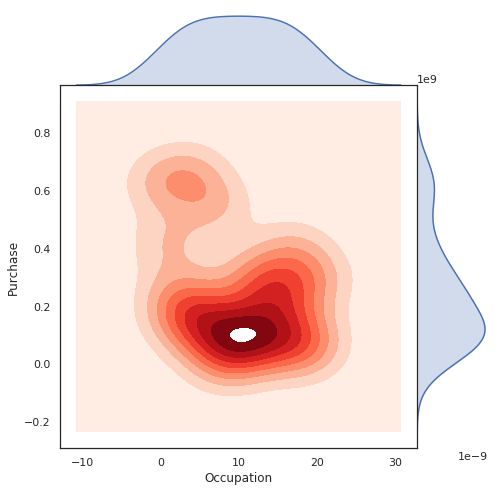

In [33]:
sns.set(style = 'white')
red = sns.color_palette('Reds')[-2]
sns.jointplot(x='Occupation', y='Purchase', data=df2, kind='kde', space=0, height=7, cmap='Reds')

This plot shows the distribution of total purchase over occupation

In [34]:
#we can drop User_ID and Product_ID as these are not needed further
dataFrame.drop(columns=['User_ID', 'Product_ID'], inplace=True)

In [35]:
#Now, we intend to see correlation matrix, for this mapping object type value to integers 
dataFrame['Age'] = dataFrame['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
dataFrame['City_Category'] = dataFrame['City_Category'].map({'A':0, 'B':1, 'C':2})
dataFrame['Gender'] = dataFrame["Gender"].map({'F':0, 'M':1})

In [36]:
dataFrame.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4+,0,8,0,0,7969


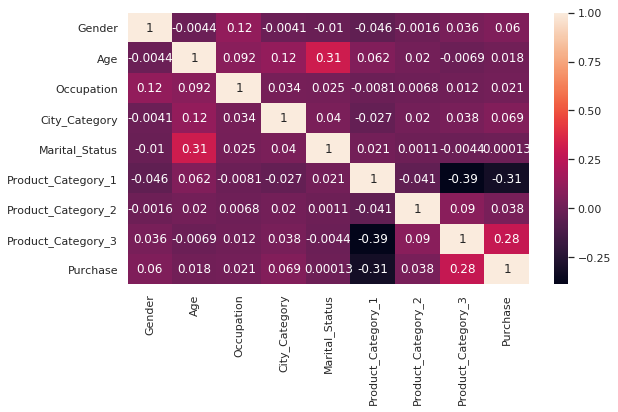

In [37]:
corr_mat = dataFrame.corr()
f, ax = plt.subplots(figsize=(9,5))
sns.heatmap(corr_mat, annot=True, ax=ax)

**As shops offer highly discounted sale and people consider this as their prime time for winter shopping, people spends heavily.** 